In [ ]:
import json
import random
import re
path="./dataset/review.json"
split_ratio = 0.8
subset_num = 100000

data = []
with open(path,'r',encoding='utf-8') as f:
    length_data = 0
    for line in f:
        length_data += 1
        

ids = list(range(length_data))
random.shuffle(ids)


train_id = ids[:int(0.8*length_data)]
test_id = ids[int(0.8*length_data):]

train_data = []
test_data = []
i=0
with open(path,'r',encoding='utf-8') as f:
    for line in f:
        content = json.loads(line)
        loading = dict()
        loading["text"] = content["text"]
        loading["stars"] = content["stars"]
        loading["id"] = i
        i += 1
        data.append(loading)

### Text Preprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
keep_stopwords = stopwords.words("english")[-36:]+stopwords.words("english")[131:133] + stopwords.words("english")[116:120]
new_stopwords = set(stopwords.words("english")).difference(set(keep_stopwords))
replace_num = "[-+]?[0-9]*\.?[0-9]+"
replace_url = "http(s?)://[^\s]+"
def review_to_words(raw_review):
    
    review_text = BeautifulSoup(raw_review).get_text()
    review_text = re.sub(r'[\t\r\n]'," ",review_text)
    url = re.sub(replace_url,"URL",raw_review)
    num = re.sub(replace_num,"NUM",url)
    letters_only = re.sub("[^a-zA-Z']", " ", num) #Also keep single quote
    
    words = letters_only.lower().split()
    
    meaningful_words = [w for w in words if not w in new_stopwords]
    
    return(" ".join(meaningful_words))

data = data[:subset_num]
clean_data = dict()    
clean_data["x"] = []
clean_data["y"] = []

import bar
step=0
total = len(data)
for each in data:
    each["text"] = review_to_words(each["text"])
    clean_data["x"].append(each["text"])
    clean_data["y"].append(each["stars"])
    bar.drawProgressBar(step/total)
    step +=1


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data["x"], clean_data["y"], test_size=0.33, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(X_train)
train_data_features = train_data_features.toarray()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 300) 
forest = forest.fit( train_data_features, y_train )

test_data_features = vectorizer.transform(X_test)
test_data_features = test_data_features.toarray()
result = forest.predict(test_data_features)


In [2]:
import pandas as pd
train = pd.read_csv("./training_data.csv", header=0, delimiter="\t")


In [4]:
data = train["comment"]

In [5]:
### Text Preprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
keep_stopwords = stopwords.words("english")[-36:]+stopwords.words("english")[131:133] + stopwords.words("english")[116:120]
new_stopwords = set(stopwords.words("english")).difference(set(keep_stopwords))
replace_num = "[-+]?[0-9]*\.?[0-9]+"
replace_url = "http(s?)://[^\s]+"
def review_to_words(raw_review):
    
    review_text = BeautifulSoup(raw_review).get_text()
    review_text = re.sub(r'[\t\r\n]'," ",review_text)
    url = re.sub(replace_url,"URL",raw_review)
    num = re.sub(replace_num,"NUM",url)
    letters_only = re.sub("[^a-zA-Z']", " ", num) #Also keep single quote
    
    words = letters_only.lower().split()
    
    meaningful_words = [w for w in words if not w in new_stopwords]
    
    return(" ".join(meaningful_words))

clean_data = dict()    
clean_data["x"] = []
clean_data["y"] = []


In [6]:
import bar
step=0
total = len(data)
for each in data:
    clean_data["x"].append(review_to_words(each))
    bar.drawProgressBar(step/total)
    step +=1
clean_data["y"] = train["score"]


[                      ] 0.13%

/home/kevindong1994/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/kevindong1994/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[                      ] 3.23%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ =                    ] 7.10%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ==                   ] 14.03%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ====                 ] 20.71%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ =====                ] 29.18%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ========             ] 41.08%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ==========           ] 50.24%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ =============        ] 65.92%

/home/kevindong1994/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


[ =============        ] 68.39%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ===============      ] 76.69%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ================     ] 83.74%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[ ===================  ] 100.00%

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data["x"], clean_data["y"], test_size=0.33, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000) 
train_data_features = vectorizer.fit_transform(X_train)
train_data_features = train_data_features.toarray()

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( train_data_features, y_train )
print("Train Complete")
test_data_features = vectorizer.transform(X_test)
test_data_features = test_data_features.toarray()
result = forest.predict(test_data_features)


Train Complete


In [11]:
accuracy = sum(result==y_test)/len(y_test)
print(accuracy)

0.38057181674691815


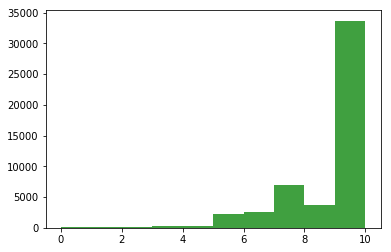

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(result, facecolor='g', alpha=0.75)
plt.show()

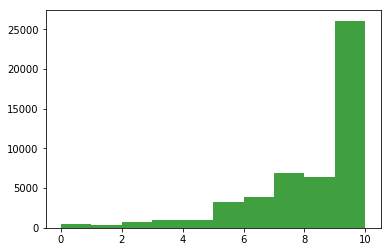

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_test, facecolor='g', alpha=0.75)
plt.show()

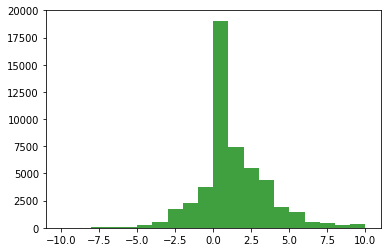

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
diff = result-y_test
plt.hist(diff,20, facecolor='g', alpha=0.75)
plt.show()

In [18]:
import numpy as np
np.sum(np.power(diff,2))

279153